<a href="https://colab.research.google.com/github/HusseinIssaOp/SeniorProjectISD/blob/main/google_tensorflow_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
la = list(uploaded.keys())[0]

Saving GOOG.csv to GOOG.csv


In [ ]:
data = pd.read_csv(la)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4818,2023-10-10,139.509995,140.740005,138.429993,139.199997,139.199997,19554900
4819,2023-10-11,139.850006,142.220001,139.839996,141.699997,141.699997,20146300
4820,2023-10-12,142.160004,142.380005,139.449997,140.289993,140.289993,18173100
4821,2023-10-13,140.649994,141.339996,137.970001,138.580002,138.580002,19438700
4822,2023-10-16,139.729996,140.904999,139.320007,140.490005,140.490005,17336000


In [ ]:

# installed it for indicators
!pip install pandas_ta
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=e1d85f456bd05ac182894da87140fdf29f238e43c6ad73d9f8573776bae1b34a
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
# technical indictaors models for analysis 12/12/2023

data['RSI']=ta.rsi(data.Close, length=10) #speed of price movemmmnt
data['EMAF']=ta.ema(data.Close, length=50)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150) #length is the previous days depending


data['Target'] = data['Adj Close']-data.Open
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data['Target'] = data['Target'].shift(-1)

#added the a feature which is named target its the subtraction of close - open




#moving averages fast/mid/slow
data.dropna(inplace=True)


data

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
149,2005-03-23,4.432635,4.489173,4.432635,4.457791,4.457791,194526410,42.259640,4.608481,4.373423,4.137123,-0.036115,4.464516
150,2005-03-24,4.500631,4.504616,4.463271,4.464516,4.464516,148763520,42.993100,4.602835,4.375227,4.141459,-0.006476,4.518563
151,2005-03-28,4.525039,4.602748,4.506857,4.518563,4.518563,350830087,48.800715,4.599531,4.378065,4.146454,-0.036862,4.472486
152,2005-03-29,4.509348,4.564890,4.435126,4.472486,4.472486,259890496,44.505777,4.594548,4.379935,4.150772,-0.004732,4.494404
153,2005-03-30,4.499136,4.519311,4.473233,4.494404,4.494404,250378977,46.972423,4.590621,4.382202,4.155324,0.063761,4.495898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4817,2023-10-09,137.990005,139.970001,136.699997,139.500000,139.500000,16599100,64.283135,132.591297,127.286759,123.055969,-0.309998,139.199997
4818,2023-10-10,139.509995,140.740005,138.429993,139.199997,139.199997,19554900,63.044607,132.850461,127.522664,123.269797,1.849991,141.699997
4819,2023-10-11,139.850006,142.220001,139.839996,141.699997,141.699997,20146300,68.639192,133.197502,127.803404,123.513906,-1.870011,140.289993
4820,2023-10-12,142.160004,142.380005,139.449997,140.289993,140.289993,18173100,62.691650,133.475639,128.050663,123.736105,-2.069992,138.580002


In [ ]:
columns_to_drop = [ 'Date', 'Volume','Close']
data.drop(columns=columns_to_drop, inplace=True)

data

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
149,4.432635,4.489173,4.432635,4.457791,42.259640,4.608481,4.373423,4.137123,-0.036115,4.464516
150,4.500631,4.504616,4.463271,4.464516,42.993100,4.602835,4.375227,4.141459,-0.006476,4.518563
151,4.525039,4.602748,4.506857,4.518563,48.800715,4.599531,4.378065,4.146454,-0.036862,4.472486
152,4.509348,4.564890,4.435126,4.472486,44.505777,4.594548,4.379935,4.150772,-0.004732,4.494404
153,4.499136,4.519311,4.473233,4.494404,46.972423,4.590621,4.382202,4.155324,0.063761,4.495898
...,...,...,...,...,...,...,...,...,...,...
4817,137.990005,139.970001,136.699997,139.500000,64.283135,132.591297,127.286759,123.055969,-0.309998,139.199997
4818,139.509995,140.740005,138.429993,139.199997,63.044607,132.850461,127.522664,123.269797,1.849991,141.699997
4819,139.850006,142.220001,139.839996,141.699997,68.639192,133.197502,127.803404,123.513906,-1.870011,140.289993
4820,142.160004,142.380005,139.449997,140.289993,62.691650,133.475639,128.050663,123.736105,-2.069992,138.580002


In [ ]:
data.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
149,4.432635,4.489173,4.432635,4.457791,42.259640,4.608481,4.373423,4.137123,-0.036115,4.464516
150,4.500631,4.504616,4.463271,4.464516,42.993100,4.602835,4.375227,4.141459,-0.006476,4.518563
151,4.525039,4.602748,4.506857,4.518563,48.800715,4.599531,4.378065,4.146454,-0.036862,4.472486
152,4.509348,4.564890,4.435126,4.472486,44.505777,4.594548,4.379935,4.150772,-0.004732,4.494404
153,4.499136,4.519311,4.473233,4.494404,46.972423,4.590621,4.382202,4.155324,0.063761,4.495898


In [ ]:
data_set = data.iloc[:, 0:11]
data_set.tail(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
4802,137.630005,139.929993,137.630005,138.960007,65.606933,131.049419,124.823203,120.569817,0.580002,138.830002
4803,138.250000,139.175003,137.500000,138.830002,64.797035,131.354540,125.100565,120.811674,-4.240006,134.589996
4804,138.830002,138.839996,134.520004,134.589996,44.769526,131.481421,125.288475,120.994168,-1.029998,131.360001
4805,132.389999,133.190002,131.089996,131.360001,35.485852,131.476659,125.408703,121.131464,-0.429993,131.250000
4806,131.679993,133.009995,130.509995,131.250000,35.209571,131.467771,125.524372,121.265485,1.399994,132.169998
4807,130.770004,132.220001,130.029999,132.169998,39.580935,131.495309,125.655969,121.409915,-1.464004,129.449997
4808,130.914001,131.404999,128.190002,129.449997,32.399868,131.415101,125.731098,121.516406,2.020005,131.460007
4809,129.440002,131.720001,129.380005,131.460007,41.164418,131.416862,125.844542,121.648110,2.440003,133.130005
4810,130.690002,134.179993,130.690002,133.130005,47.453679,131.484044,125.988809,121.800188,-2.229996,131.850006
4811,134.080002,134.889999,131.320007,131.850006,43.494166,131.498395,126.104872,121.933298,3.014999,135.169998


In [ ]:
from sklearn.preprocessing import MinMaxScaler

    #because im using neural networks so btw 0 and 1
zz = MinMaxScaler(feature_range=(0,1))
data_set_scaled = zz.fit_transform(data_set)
print(data_set_scaled)

[[3.37784313e-06 0.00000000e+00 5.65023093e-05 ... 0.00000000e+00
  4.57107741e-01 0.00000000e+00]
 [4.64582304e-04 1.04619693e-04 2.67112450e-04 ... 3.26018011e-05
  4.59194849e-01 3.69566075e-04]
 [6.30137314e-04 7.69421849e-04 5.66748617e-04 ... 7.01537925e-05
  4.57055139e-01 5.44977819e-05]
 ...
 [9.18514696e-01 9.33067209e-01 9.30927484e-01 ... 8.97509588e-01
  3.27969129e-01 9.28756239e-01]
 [9.34182991e-01 9.34151168e-01 9.28246398e-01 ... 8.99180151e-01
  3.13886941e-01 9.17063552e-01]
 [9.23940869e-01 9.27105553e-01 9.18072023e-01 ... 9.00658307e-01
  5.13168907e-01 9.30123894e-01]]


In [ ]:
print(data_set_scaled.shape[0])

4673


In [ ]:
X = []

backcandles = 30      # choosing how many days before to predict it


for j in range(9):                     # the first 9 columns are the input
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])


In [ ]:

  #stackoverflow helping the this line due to error
X=np.moveaxis(X, [0], [2])


X, yt =np.array(X), np.array(data_set_scaled[backcandles:,-1])  # the last 1 columns
y=np.reshape(yt,(len(yt),1))

In [ ]:
print(X)
print(X.shape)

[[[3.37784313e-06 0.00000000e+00 5.65023093e-05 ... 0.00000000e+00
   0.00000000e+00 4.57107741e-01]
  [4.64582304e-04 1.04619693e-04 2.67112450e-04 ... 1.31363927e-05
   3.26018011e-05 4.59194849e-01]
  [6.30137314e-04 7.69421849e-04 5.66748617e-04 ... 3.38067249e-05
   7.01537925e-05 4.57055139e-01]
  ...
  [7.45013147e-03 7.33308645e-03 7.28896977e-03 ... 1.74873381e-03
   1.80446872e-03 4.67262667e-01]
  [7.41634626e-03 8.08394598e-03 7.47902487e-03 ... 1.89583920e-03
   1.92959108e-03 4.61878254e-01]
  [8.32523024e-03 8.37584868e-03 8.45157405e-03 ... 2.04832853e-03
   2.05878543e-03 4.56774525e-01]]

 [[4.64582304e-04 1.04619693e-04 2.67112450e-04 ... 1.31363927e-05
   3.26018011e-05 4.59194849e-01]
  [6.30137314e-04 7.69421849e-04 5.66748617e-04 ... 3.38067249e-05
   7.01537925e-05 4.57055139e-01]
  [5.23708125e-04 5.12950157e-04 7.36269294e-05 ... 4.74230236e-05
   1.02620057e-04 4.59317657e-01]
  ...
  [7.41634626e-03 8.08394598e-03 7.47902487e-03 ... 1.89583920e-03
   1.92959

In [ ]:
splitdata =  int(len(X)*0.80) # 80% training data
print(splitdata)

3714


In [ ]:
    #split training and testing using the arrays up
X_train, X_test = X[:splitdata], X[splitdata:]
y_train, y_test = y[:splitdata], y[splitdata:]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3714, 30, 9)
(3714, 1)
(929, 30, 9)
(929, 1)


In [ ]:
from keras.layers import LSTM

from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Dropout

from keras.models import  Sequential


import tensorflow as tf
import keras
from keras.models import Model
from keras import optimizers
from keras.callbacks import History
from keras.layers import Input, Activation, concatenate


import numpy as np
# imported all the libraries am using keras , tensorflow etc

In [ ]:



lstm_input = Input(shape=(backcandles,9), name='lstm_input') #shape is 30 days with 9 columns in input
inputs = LSTM(150, name='first_layer')(lstm_input)

#200 nodes for lstm anddd 1 for dense layer
#inter mediate layer
inputs = Dense(1,name='dense_layer')(inputs)
output = Activation('linear',name='output')(inputs)

#added them to t he model <<
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam,loss='mse')


#model fir ..
model.fit(x=X_train,y=y_train,batch_size=15,epochs=30,shuffle=True, validation_data=(X_test, y_test))

Epoch 1/30
248/248 [==============================] - 12s 39ms/step - loss: 4.6832e-04 - val_loss: 0.0010
Epoch 2/30
248/248 [==============================] - 8s 31ms/step - loss: 3.0633e-05 - val_loss: 0.0011
Epoch 3/30
248/248 [==============================] - 9s 38ms/step - loss: 3.3669e-05 - val_loss: 7.5883e-04
Epoch 4/30
248/248 [==============================] - 8s 32ms/step - loss: 2.5546e-05 - val_loss: 7.7281e-04
Epoch 5/30
248/248 [==============================] - 11s 43ms/step - loss: 2.6655e-05 - val_loss: 0.0012
Epoch 6/30
248/248 [==============================] - 10s 39ms/step - loss: 3.2260e-05 - val_loss: 8.2572e-04
Epoch 7/30
248/248 [==============================] - 8s 33ms/step - loss: 2.7784e-05 - val_loss: 4.9239e-04
Epoch 8/30
248/248 [==============================] - 9s 36ms/step - loss: 2.9529e-05 - val_loss: 5.4628e-04
Epoch 9/30
248/248 [==============================] - 10s 39ms/step - loss: 2.6106e-05 - val_loss: 5.5464e-04
Epoch 10/30
248/248 [======

In [ ]:
y_pred = model.predict(X_test)

for i in range(10):
  print(y_pred[i], y_test[i])

30/30 [==============================] - 2s 15ms/step
[0.46658814] [0.47521099]
[0.47128877] [0.48527972]
[0.48022628] [0.48531733]
[0.4769118] [0.48855847]
[0.48061287] [0.48732427]
[0.48203096] [0.48940298]
[0.48218963] [0.48903712]
[0.48336992] [0.49143725]
[0.4830998] [0.48851747]
[0.4836597] [0.47722132]


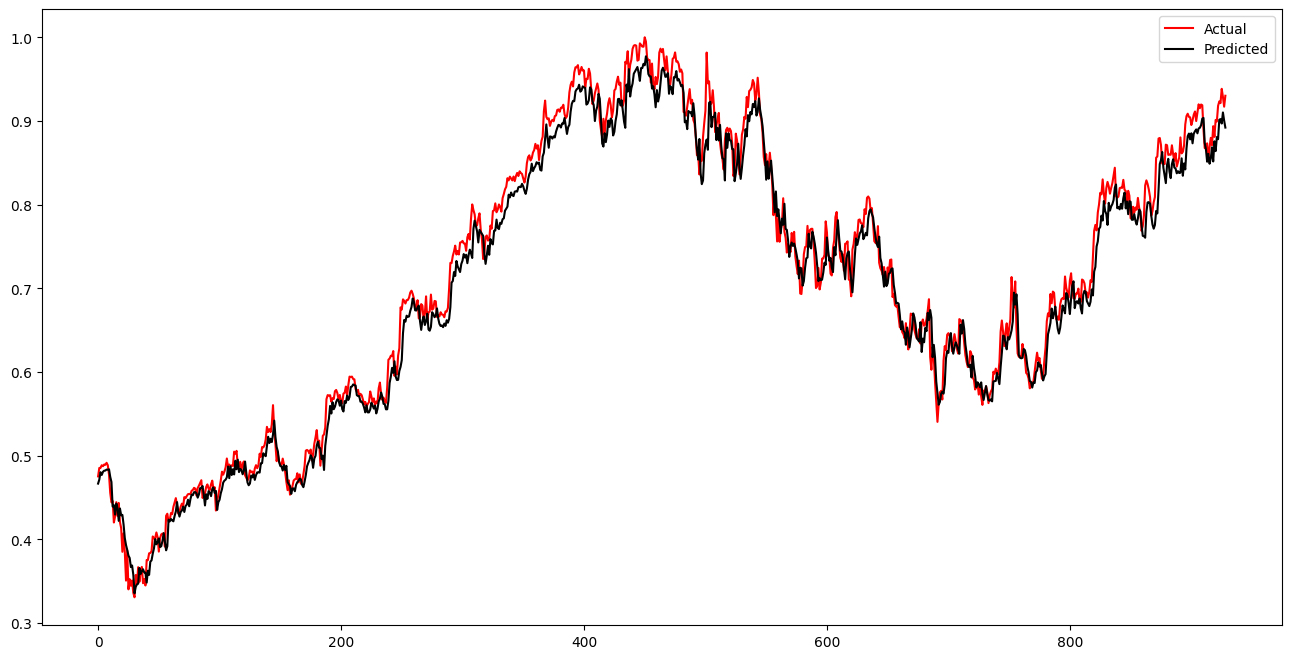

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = "red", label='Actual')
plt.plot(y_pred, color = "black", label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data_reshaped = data_set.TargetNextClose.values.reshape(-1, 1)

zz.fit(data_reshaped)


y_pred_original = zz.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = zz.inverse_transform(y_test.reshape(-1, 1)).flatten()

last_50_indices = range(-50, 0)
for i in last_50_indices:
    print(f"Prediction: {y_pred_original[i]}, Actual: {y_test_original[i]}")



Prediction: 125.21819305419922, Actual: 131.940002
Prediction: 128.42527770996094, Actual: 131.839996
Prediction: 129.46353149414062, Actual: 130.149994
Prediction: 127.21133422851562, Actual: 130.210007
Prediction: 126.08915710449219, Actual: 130.169998
Prediction: 128.5226593017578, Actual: 131.830002
Prediction: 129.3920440673828, Actual: 130.270004
Prediction: 127.93574523925781, Actual: 129.110001
Prediction: 127.77542877197266, Actual: 130.460007
Prediction: 126.93152618408203, Actual: 128.110001
Prediction: 127.29872131347656, Actual: 128.929993
Prediction: 126.9852294921875, Actual: 129.690002
Prediction: 127.04002380371094, Actual: 133.210007
Prediction: 129.5491485595703, Actual: 130.419998
Prediction: 126.50546264648438, Actual: 130.690002
Prediction: 128.65457153320312, Actual: 131.789993
Prediction: 127.61685180664062, Actual: 135.490005
Prediction: 131.25833129882812, Actual: 136.929993
Prediction: 133.42245483398438, Actual: 137.350006
Prediction: 133.87918090820312, Act

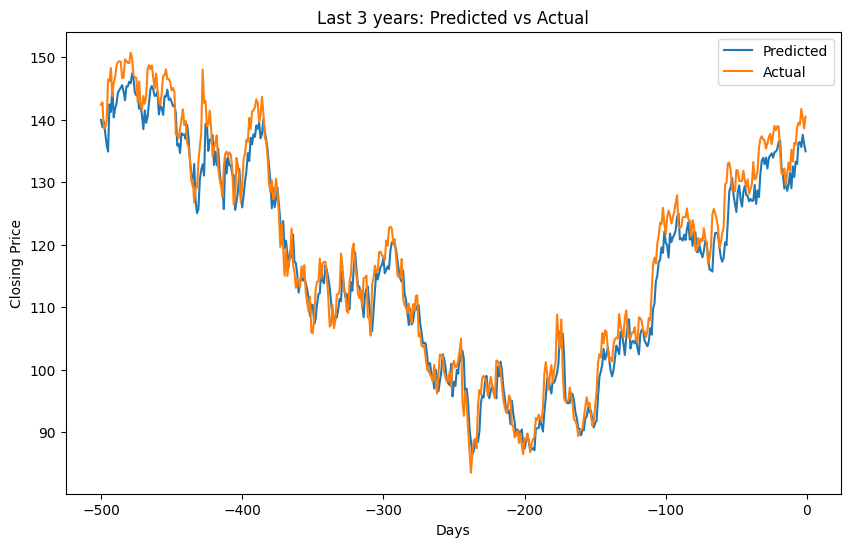

In [ ]:
import matplotlib.pyplot as plt


data_reshaped = data_set.TargetNextClose.values.reshape(-1, 1)

zz.fit(data_reshaped)

y_pred_original = zz.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = zz.inverse_transform(y_test.reshape(-1, 1)).flatten()

last_3y_indices = range(-500, 0)

plt.figure(figsize=(10, 6))
plt.plot(last_3y_indices, y_pred_original[last_3y_indices], label='Predicted')
plt.plot(last_3y_indices, y_test_original[last_3y_indices], label='Actual')
plt.title('Last 3 years: Predicted vs Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mse = model.evaluate(X_test, y_test, verbose=0)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}') #low error good
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r_squared}')

Mean Squared Error (MSE): 0.0004888794501312077
Mean Absolute Error (MAE): 0.01765395791428916
R-squared: 0.9832069470277535
